In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("./input/columba.csv")

In [3]:
df.head()

,transactionid,commitdate,ns,nm,nf,entropy,la,ld,lt,fix,ndev,pd,npt,exp,rexp,sexp,bug
0,1,2006/7/8 9:06,1,2,2,0.954434,0.102564,0.102564,39.0,0,1,53,1.0,21140,8343.008333,1188,0
1,6,2006/5/28 22:53,1,3,3,0.693298,0.333333,0.091503,102.0,0,6,24,1.0,70,70.000000,70,0
2,10,2006/5/4 11:48,1,1,1,0.000000,0.097345,0.044248,113.0,1,3,41,1.0,2402,713.716667,2396,0
3,28,2005/9/27 11:09,1,3,4,0.894836,0.035484,0.034409,232.5,0,8,97,1.0,16307,5914.816667,15716,0
4,41,2005/1/24 11:41,1,1,1,0.000000,0.103234,0.004975,804.0,0,4,8,1.0,1778,712.283333,1774,1


In [4]:
X = df.iloc[:, :-1]
X.drop("commitdate", axis =1, inplace=True)
y = df.iloc[:, 16]

In [5]:
from sklearn.model_selection import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3118, 15)
(1337, 15)
(3118,)
(1337,)


In [7]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_p_lr = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
print("ロジスティック回帰の混合行列", confusion_matrix(y_test, y_p_lr))

print ("ロジスティック回帰での正答率", accuracy_score(y_test, y_p_lr))
#ロジスティック回帰正答率

ロジスティック回帰の混合行列 [[885  34]
 [354  64]]
ロジスティック回帰での正答率 0.7097980553477936


In [8]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')

svm.fit(X_train, y_train)
y_p_svm = svm.predict(X_test)
# 正答率を算出
print('SVMでの正答率', accuracy_score(y_test, y_p_svm))
print("ロジスティック回帰の混合行列", confusion_matrix(y_test, y_p_svm))

SVMでの正答率 0.7090501121914734
ロジスティック回帰の混合行列 [[884  35]
 [354  64]]


knnの混合行列 [[832  87]
 [340  78]]
knnでの正答率 0.680628272251309


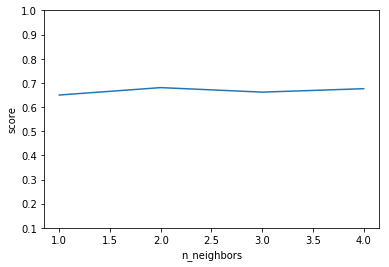

In [9]:
from sklearn.neighbors import KNeighborsClassifier

list_nn = []
list_score = []
for k in range(1, 5):
    knc = KNeighborsClassifier(n_neighbors=k)
    knc.fit(X_train, y_train)
    Y_pred = knc.predict(X_test)
    score = knc.score(X_test, y_test)
#     print("[%d] score: {:.2f}".format(score) % k)
    list_nn.append(k)
    list_score.append(score)

#プロット
plt.ylim(0.1, 1.0)
plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.plot(list_nn, list_score)

#k = 2の時が良い
knc = KNeighborsClassifier(n_neighbors=2)
knc.fit(X_train, y_train)
Y_pred = knc.predict(X_test)
score = knc.score(X_test, y_test)
print("knnの混合行列", confusion_matrix(y_test, Y_pred))
print ("knnでの正答率", accuracy_score(y_test, Y_pred))

In [10]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
%matplotlib inline
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D

Using TensorFlow backend.


In [11]:
# from keras.models import Sequential, Model
# from keras.layers import Dense, Dropout, Activation, Flatten, Add, Input
# from keras.layers.advanced_activations import LeakyReLU
# from keras.layers.convolutional import Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization

# lookback = 5

# #データを4次元化
# X_train = X_train.reshape((len(X_train),lookback,1,1))
# X_val = X_val.reshape((len(X_val),lookback,1,1))
# X_test = X_test.reshape((len(X_test),lookback,1,1))

# #CNNの学習
# input_ = Input(shape=(lookback, 1,1))#横の数、縦の数、RGB

# c = Conv2D(8, (3, 1),padding='same',activation='relu')(input_)
# c = Dropout(0.2)(c)
# c = MaxPooling2D(pool_size=(2, 1))(c)

# c = Flatten()(c)
# c = Dense(30,activation='relu')(c)
# c = Dropout(0.2)(c)
# c = Dense(4, activation='softmax')(c)

# model = Model(input_, c)

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# hist = model.fit(X_train, Y_train, batch_size = 10, epochs=100, verbose=1, shuffle=True,
#                  validation_data = (X_val,Y_val))
# #結果描画
# plt.figure()               
# plt.plot(hist.history['val_loss'],label="val_loss")
# plt.plot(hist.history['loss'],label="train_loss")
# plt.legend()
# plt.show()

# plt.figure()               
# plt.plot(hist.history['val_acc'],label="val_acc")
# plt.plot(hist.history['acc'],label="train_acc")
# plt.legend(loc="lower right")
# plt.show()

In [12]:
from __future__ import print_function
 
from keras.models import Model
from keras.utils import np_utils
import numpy as np

import keras 
from keras.callbacks import ReduceLROnPlateau
      
def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y
  
nb_epochs = 200


#flist = ['Adiac', 'Beef', 'CBF', 'ChlorineConcentration', 'CinC_ECG_torso', 'Coffee', 'Cricket_X', 'Cricket_Y', 'Cricket_Z', 
#'DiatomSizeReduction', 'ECGFiveDays', 'FaceAll', 'FaceFour', 'FacesUCR', '50words', 'FISH', 'Gun_Point', 'Haptics', 
#'InlineSkate', 'ItalyPowerDemand', 'Lighting2', 'Lighting7', 'MALLAT', 'MedicalImages', 'MoteStrain', 'NonInvasiveFatalECG_Thorax1', 
#'NonInvasiveFatalECG_Thorax2', 'OliveOil', 'OSULeaf', 'SonyAIBORobotSurface', 'SonyAIBORobotSurfaceII', 'StarLightCurves', 'SwedishLeaf', 'Symbols', 
#'synthetic_control', 'Trace', 'TwoLeadECG', 'Two_Patterns', 'uWaveGestureLibrary_X', 'uWaveGestureLibrary_Y', 'uWaveGestureLibrary_Z', 'wafer', 'WordsSynonyms', 'yoga']

# flist  = ['Adiac']
# for each in flist:
# fname = each

# x_train, y_train = readucr(fname+'/'+fname+'_TRAIN')
# x_test, y_test = readucr(fname+'/'+fname+'_TEST')
nb_classes = len(np.unique(y_test))
batch_size = min(X_train.shape[0]/10, 16)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)

print(X_train.__class__.__name__)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train_mean = X_train.mean()
X_train_std = X_train.std()
X_train = (X_train - X_train_mean)/(X_train_std)

X_test = (X_test - X_train_mean)/(X_train_std)
X_train = X_train.reshape(X_train.shape + (1,1,))
X_test = X_test.reshape(X_test.shape + (1,1,))

x = keras.layers.Input(X_train.shape[1:])
#    drop_out = Dropout(0.2)(x)
conv1 = keras.layers.Conv2D(128, 8, 1, border_mode='same')(x)
conv1 = keras.layers.normalization.BatchNormalization()(conv1)
conv1 = keras.layers.Activation('relu')(conv1)

#    drop_out = Dropout(0.2)(conv1)
conv2 = keras.layers.Conv2D(256, 5, 1, border_mode='same')(conv1)
conv2 = keras.layers.normalization.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)

#    drop_out = Dropout(0.2)(conv2)
conv3 = keras.layers.Conv2D(128, 3, 1, border_mode='same')(conv2)
conv3 = keras.layers.normalization.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)

full = keras.layers.pooling.GlobalAveragePooling2D()(conv3)    
out = keras.layers.Dense(nb_classes, activation='softmax')(full)


model = Model(input=x, output=out)

optimizer = keras.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                  patience=50, min_lr=0.0001) 
hist = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs,
          verbose=1, validation_data=(X_test, Y_test), callbacks = [reduce_lr])
#Print the testing results which has the lowest training loss.
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_acc'])


ndarray


/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (8, 1), padding="same")`
/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (5, 1), padding="same")`
/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:68: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 1), padding="same")`
/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
/Users/kodaihatori/.pyenv/versions/miniconda3-4.3.30/lib/python3.6/site-packages/ipykernel_launcher.py:86: UserWarning: The `nb_epoch` argument in `fit` has been renamed 

Train on 3118 samples, validate on 1337 samples
Epoch 1/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.6259 - acc: 0.6838 - val_loss: 0.6379 - val_acc: 0.6889
Epoch 2/200
3118/3118 [==============================] - 3s 958us/step - loss: 0.6119 - acc: 0.6969 - val_loss: 0.6501 - val_acc: 0.6866
Epoch 3/200
3118/3118 [==============================] - 3s 968us/step - loss: 0.6088 - acc: 0.6976 - val_loss: 0.6954 - val_acc: 0.5759
Epoch 4/200
3118/3118 [==============================] - 3s 949us/step - loss: 0.6075 - acc: 0.6966 - val_loss: 0.6227 - val_acc: 0.6881
Epoch 5/200
3118/3118 [==============================] - 3s 952us/step - loss: 0.6037 - acc: 0.7017 - val_loss: 0.6300 - val_acc: 0.6896
Epoch 6/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.6073 - acc: 0.7011 - val_loss: 0.6231 - val_acc: 0.6896
Epoch 7/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.6052 - acc: 0.7017 - val_loss: 0.6250 - val_acc: 0.6911

Epoch 61/200
3118/3118 [==============================] - 3s 1ms/step - loss: 0.5775 - acc: 0.7235 - val_loss: 0.6049 - val_acc: 0.7091
Epoch 62/200
3118/3118 [==============================] - 3s 1ms/step - loss: 0.5774 - acc: 0.7207 - val_loss: 0.6158 - val_acc: 0.7016
Epoch 63/200
3118/3118 [==============================] - 3s 1ms/step - loss: 0.5792 - acc: 0.7171 - val_loss: 0.5999 - val_acc: 0.7023
Epoch 64/200
3118/3118 [==============================] - 3s 1ms/step - loss: 0.5776 - acc: 0.7149 - val_loss: 0.5970 - val_acc: 0.7046
Epoch 65/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.5753 - acc: 0.7229 - val_loss: 0.6237 - val_acc: 0.6814
Epoch 66/200
3118/3118 [==============================] - 3s 1ms/step - loss: 0.5767 - acc: 0.7149 - val_loss: 0.6049 - val_acc: 0.7001
Epoch 67/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.5755 - acc: 0.7152 - val_loss: 0.6062 - val_acc: 0.7105
Epoch 68/200
3118/3118 [========================

Epoch 121/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.5675 - acc: 0.7248 - val_loss: 0.6313 - val_acc: 0.6776
Epoch 122/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.5651 - acc: 0.7271 - val_loss: 0.6023 - val_acc: 0.7068
Epoch 123/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.5627 - acc: 0.7245 - val_loss: 0.5941 - val_acc: 0.7053
Epoch 124/200
3118/3118 [==============================] - 3s 992us/step - loss: 0.5630 - acc: 0.7271 - val_loss: 0.6254 - val_acc: 0.6776
Epoch 125/200
3118/3118 [==============================] - 3s 994us/step - loss: 0.5620 - acc: 0.7261 - val_loss: 0.6036 - val_acc: 0.7128
Epoch 126/200
3118/3118 [==============================] - 3s 994us/step - loss: 0.5623 - acc: 0.7271 - val_loss: 0.5960 - val_acc: 0.7098
Epoch 127/200
3118/3118 [==============================] - 3s 998us/step - loss: 0.5618 - acc: 0.7261 - val_loss: 0.7094 - val_acc: 0.5714
Epoch 128/200
3118/3118 [========

3118/3118 [==============================] - 4s 1ms/step - loss: 0.5437 - acc: 0.7396 - val_loss: 0.6191 - val_acc: 0.6896
Epoch 181/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.5439 - acc: 0.7296 - val_loss: 0.6743 - val_acc: 0.7053
Epoch 182/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.5456 - acc: 0.7335 - val_loss: 0.7659 - val_acc: 0.7001
Epoch 183/200
3118/3118 [==============================] - 5s 2ms/step - loss: 0.5420 - acc: 0.7351 - val_loss: 0.6044 - val_acc: 0.7023
Epoch 184/200
3118/3118 [==============================] - 4s 1ms/step - loss: 0.5435 - acc: 0.7360 - val_loss: 0.5955 - val_acc: 0.7023
Epoch 185/200
3118/3118 [==============================] - 3s 1ms/step - loss: 0.5421 - acc: 0.7351 - val_loss: 0.7139 - val_acc: 0.5894
Epoch 186/200
3118/3118 [==============================] - 3s 1ms/step - loss: 0.5435 - acc: 0.7421 - val_loss: 0.6399 - val_acc: 0.6821
Epoch 187/200
3118/3118 [==============================